# Assignment 1 Report

This is an outline for your report to ease the amount of work required to create your report. Jupyter notebook supports markdown, and I recommend you to check out this [cheat sheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet). If you are not familiar with markdown.

Before delivery, **remember to convert this file to PDF**. You can do it in two ways:
1. Print the webpage (ctrl+P or cmd+P)
2. Export with latex. This is somewhat more difficult, but you'll get somehwat of a "prettier" PDF. Go to File -> Download as -> PDF via LaTeX. You might have to install nbconvert and pandoc through conda; `conda install nbconvert pandoc`.

# Task 1

## Task 1a) and b)

![](task1/Task1ab.jpg)

## Task 1c)
![](task1/Task1c.jpg)


# Task 2

### Task 2f)
![](task2/precision_recall_curve.png)

# Task 3

### Task 3a)

The filtering operation is called matching strategy. Where the matching strategy is to match the default bounding boxes with IoU (or jaccard overlap) > 0.5
to any ground truth.

### Task 3b)
The statement is false. Feature maps from deeper layers in SSD has lower resolutions.
Feature maps with lower resolutions are used to detect larger objects.
### Task 3c)
Many different objects can appear in any spatial location of an image. Having multiple anchors with different aspect ratios
allow detection of a wider range of objects at each location.

### Task 3d)
The main difference between YOLO and SSD is that SSD adds several feature layers at the end of their backbone network, whereas YOLO has fully connected layers after their backbone network.
This allows SSD to make predictions for objects at multiple scales and use lower resolutions to detect objects which increases detection speed.

### Task 3e)
One anchor location for each cell ==> 38 x 38  anchor locations
Six anchors per anchor location ==> Total number of anchors = 38 x 38 x 6 = 8664 anchors
### Task 3f)
38 x 38 x 6 = 8664 anchors

19 x 19 x 6 = 2166 anchors

10 x 10 x 6 = 600  anchors

5 x 5 x 6 = 150 anchors

3 x 3 x 6 = 54 anchors

1 x 1 x 6 = 6 anchors

==> Total number of anchors  = 11640 anchors




# Task 4

## Task 4b)

![](task4_plots/total_loss.png)

Evaluation performance after 6000 iterations:

|Class|Average precision|
|:----:|:----------:    |
|0 | 0.8059|
|1 | 0.6524|
|2 | 0.7414|
|3 | 0.7819|
|4 | 0.7875|
|5 | 0.7621|
|6 | 0.7845|
|7 | 0.7639|
|8 | 0.7769|
|9 | 0.7341|

|mAP|
|:----:|
|0.7591|


## Task 4c) and d)
The first improvement was to introduce cyclic learning rate, since this seems like a very effective approach to tuning the learning rate, and has shown great results in [the paper by Leslie N. Smith](https://arxiv.org/abs/1506.01186). We've just implemented a not too sophisticated learning rate scheduler in train.py. We set the scheduler with base_lr = 2e-4, max_lr 2e-1, mode='triangular2' and 3000 iterations to reach a full cycle (step_size_up=1500).

![](task4_plots/4d_lr.png)
*Here we see the learning rate vary cyclicly with the upper bounds decreasing for each cycle according to the 'triangular2' mode*


The second significant improvement was to lower and increase the size range of the two smallest bounding boxes from [30,60] and [60,111] to [10,40] and [40,111]. We credit our fellow students who contributed in [this discussion](https://piazza.com/class/kjvrhk2v4w7pu?cid=248) for proposing this improvement to our training. 

Another improvement was to replace all ReLU activation functions to ELU activations. We further added parameters by doubling the amount of output channels in each of the layers compared to task 4 a). We also added batch normalization after each convolution layer. 

We trained the network for 10 000 iterations, but reached the best performance at 9000 iterations. 

The following tables and figures document our performance after 9000 iterations


|Class|Average precision|
|:----:|:----------:    |
|0| 0.9066|
|1| 0.8818|
|2| 0.9021|
|3| 0.9044|
|4| 0.9046|
|5| 0.9018|
|6| 0.9034|
|7| 0.8972|
|8| 0.9011|
|9| 0.8969|

|mAP|
|:----:|
|0.9000|

![](task4_plots/4d_total_loss.png)
*Total loss for the improved network*



## Task 4e)
The network trained in task c)/d) produced the following classified images:


![](SSD/demo/mnist/result/0.png)
![](SSD/demo/mnist/result/1.png)
![](SSD/demo/mnist/result/2.png)
![](SSD/demo/mnist/result/3.png)
![](SSD/demo/mnist/result/4.png)
![](SSD/demo/mnist/result/5.png)
![](SSD/demo/mnist/result/6.png)
![](SSD/demo/mnist/result/7.png)
![](SSD/demo/mnist/result/8.png)
![](SSD/demo/mnist/result/9.png)
![](SSD/demo/mnist/result/10.png)
![](SSD/demo/mnist/result/11.png)
![](SSD/demo/mnist/result/12.png)
![](SSD/demo/mnist/result/13.png)
![](SSD/demo/mnist/result/14.png)

We can see that it struggles a little with detecting ones, sevens, nines and some fives. If we look at the table of AP in task c)/d), we see that these are the three classes that has the lowest AP. 


## Task 4f)
![](task4_plots/total_loss_4f.svg)
*Total loss for the network*


|Class|Average precision|
|:----:|:----------:    |
| aeroplane       | 0.4591|
| bicycle         | 0.5417|
| bird            | 0.4244|
| boat            | 0.2106|
| bottle          | 0.1871|
| bus             | 0.5104|
| car             | 0.7083|
| cat             | 0.5969|
| chair           | 0.3094|
| cow             | 0.4587|
| diningtable     | 0.3416|
| dog             | 0.5768|
| horse           | 0.6085|
| motorbike       | 0.4775|
| person| 0.5948|
| pottedplant| 0.1675|
| sheep| 0.4564|
| sofa | 0.4081|
| train| 0.4662|
| tvmonitor| 0.4960|

|mAP|
|:----:|
|0.4500|



The network trained in task f) produced the following classified images:
![](task4_images/000542.png)
![](task4_images/004101.png)
![](task4_images/008591.png)
![](task4_images/003123.png)
![](task4_images/000342.png)


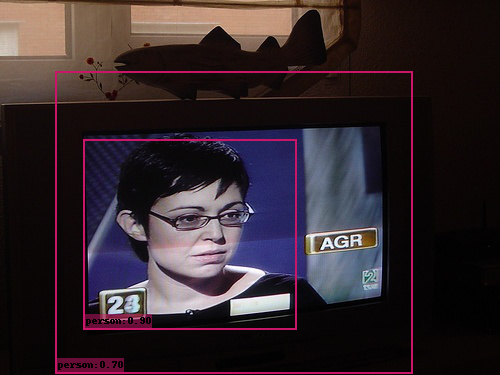
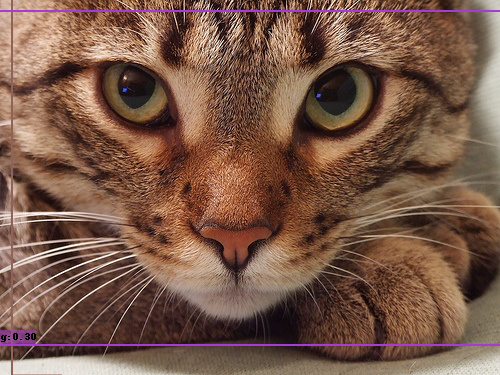
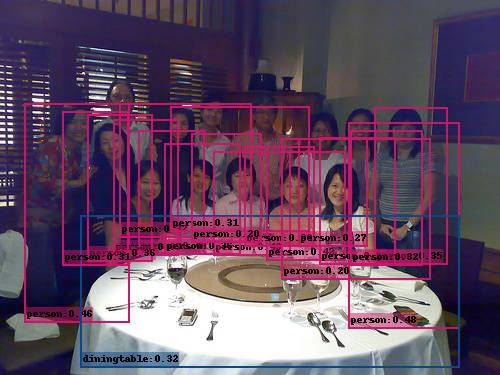
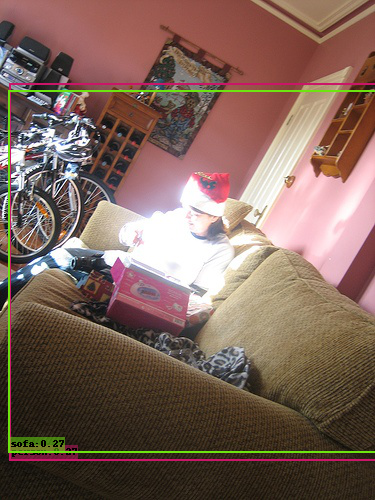
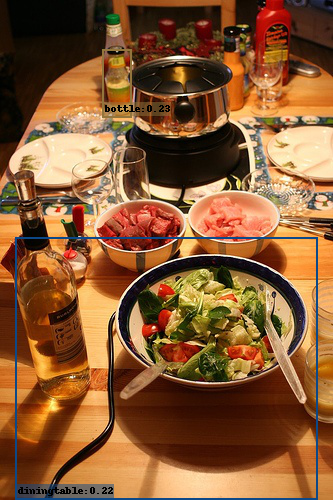